In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
version = 'v1'

# label load

In [3]:
train_X = pd.read_excel('./data/all_10_random_12000_262_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2794,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_X = pd.read_excel('./data/all_10_random_12000_262_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_X = pd.read_excel('./data/all_10_random_12000_262_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,4차산업혁명,가족건강성,간호,간호대학생,간호사,감정,감정노동,개인정보,개인정보보호,개인정보보호법,...,한류,한반도,한중,해외직접투자,핵심역량,행복감,현상학,확인적요인분석,회복탄력성,희망
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2798, 262)
(932, 262)
(932, 262)


# Stacked autoencoder

In [7]:
encoding_dim = 4

input_label = keras.Input(shape=(one_hot_train_labels.shape[1],))
encoded = layers.Dense(256, activation='relu')(input_label)
dropout = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(128, activation='relu')(dropout)
encoded = layers.Dense(64, activation='relu')(dropout)
dropout = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(32, activation='relu')(dropout)
encoded = layers.Dense(16, activation='relu')(dropout)
dropout = layers.Dropout(0.2)(encoded)
encoded = layers.Dense(8, activation='relu')(dropout)

latent_space = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(8, activation='relu')(latent_space)
dropout = layers.Dropout(0.2)(encoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
dropout = layers.Dropout(0.2)(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
dropout = layers.Dropout(0.2)(encoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(one_hot_train_labels.shape[1], activation='sigmoid')(decoded)

autoencoder = keras.Model(input_label, decoded)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 262)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               67328     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0   

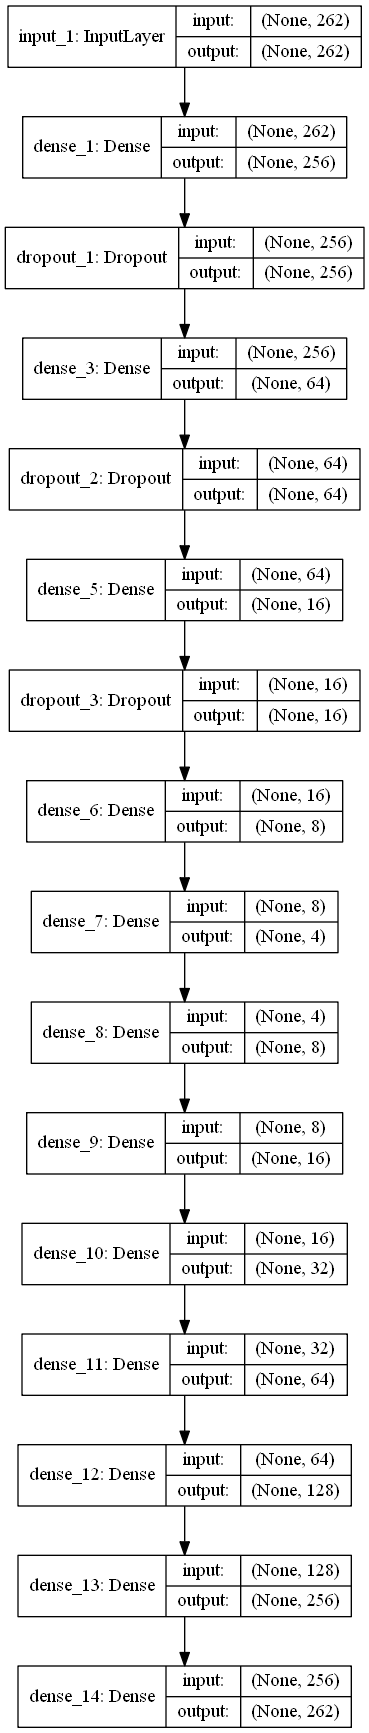

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Stacked_AE_extra_all_{}.png'.format(version))

In [9]:
encoder = keras.Model(input_label, latent_space)

encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 262)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               67328     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0   

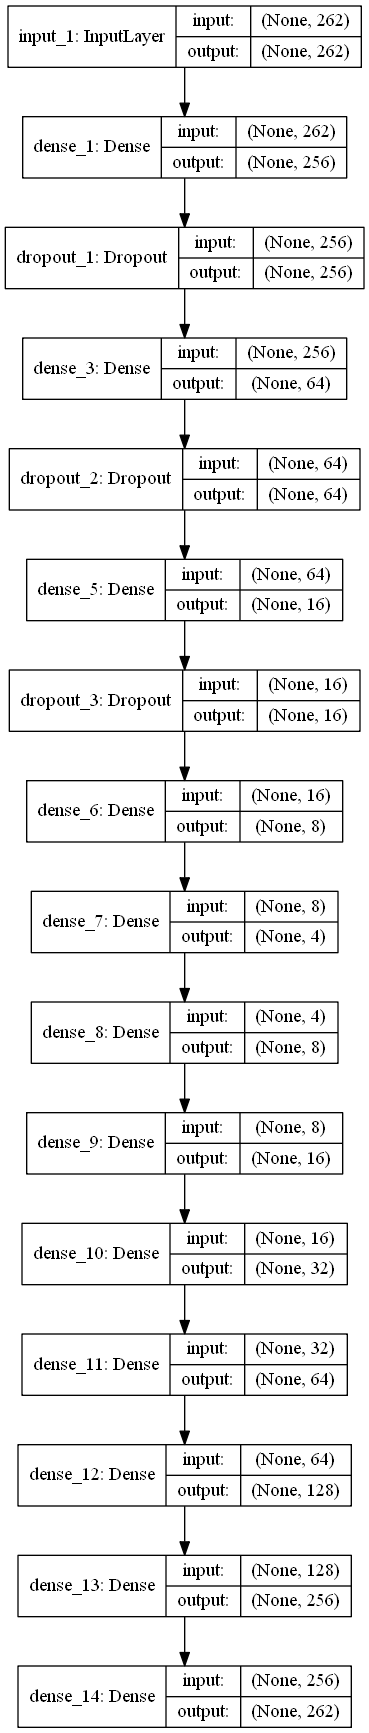

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Stacked_Encoder_extra_all_{}.png'.format(version))

In [11]:
encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer1 = autoencoder.layers[-7](encoded_input)
decoder_layer2 = autoencoder.layers[-6](decoder_layer1)
decoder_layer3 = autoencoder.layers[-5](decoder_layer2)
decoder_layer4 = autoencoder.layers[-4](decoder_layer3)
decoder_layer5 = autoencoder.layers[-3](decoder_layer4)
decoder_layer6 = autoencoder.layers[-2](decoder_layer5)
decoder_layer7 = autoencoder.layers[-1](decoder_layer6)

decoder = keras.Model(encoded_input, decoder_layer7)

decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 256)               3302

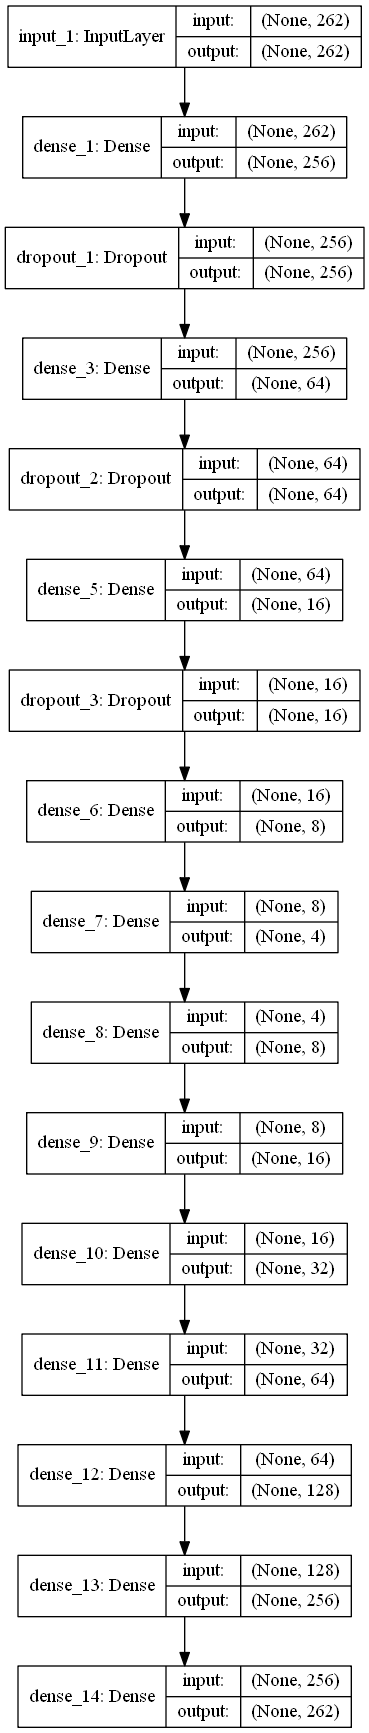

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Stacked_Decoder_extra_all_{}.png'.format(version))

In [13]:
optimizer = keras.optimizers.Adam(lr=0.001)

autoencoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
encoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
decoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)

In [14]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

filename = './trained_model/stacked_ae_extra_all_{}'.format(version) + '-{epoch:02d}-{val_loss:.5f}.h5'
mc = callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='auto')

In [15]:
history = autoencoder.fit(one_hot_train_labels,
                          one_hot_train_labels,
                          epochs=300,
                          batch_size=64,
                          validation_data=(one_hot_val_labels, one_hot_val_labels),
                          callbacks=[es, mc])

Train on 2798 samples, validate on 932 samples
Epoch 1/300
2798/2798 [==============================] - 1s 301us/step - loss: 0.3492 - val_loss: 0.0629

Epoch 00001: saving model to ./trained_model/stacked_ae_extra_all_v4-01-0.06293.h5
Epoch 2/300
2798/2798 [==============================] - 0s 82us/step - loss: 0.0412 - val_loss: 0.0329

Epoch 00002: saving model to ./trained_model/stacked_ae_extra_all_v4-02-0.03286.h5
Epoch 3/300
2798/2798 [==============================] - 0s 92us/step - loss: 0.0337 - val_loss: 0.0319

Epoch 00003: saving model to ./trained_model/stacked_ae_extra_all_v4-03-0.03193.h5
Epoch 4/300
2798/2798 [==============================] - 0s 81us/step - loss: 0.0323 - val_loss: 0.0316

Epoch 00004: saving model to ./trained_model/stacked_ae_extra_all_v4-04-0.03157.h5
Epoch 5/300
2798/2798 [==============================] - 0s 81us/step - loss: 0.0317 - val_loss: 0.0314

Epoch 00005: saving model to ./trained_model/stacked_ae_extra_all_v4-05-0.03140.h5
Epoch 6/300


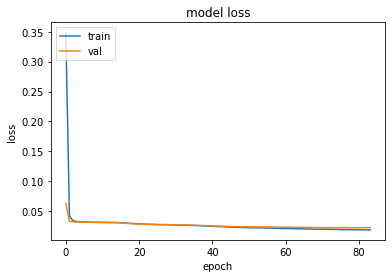

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
encoder.save('./trained_model/stacked_encoder_extra_all_{}.h5'.format(version))
decoder.save('./trained_model/stacked_decoder_extra_all_{}.h5'.format(version))

# inference

In [18]:
encoded_values = encoder.predict(one_hot_test_labels)
encoded_values

array([[3.1516993 , 5.080933  , 7.1640773 , 7.8518443 ],
       [0.2255066 , 0.16121334, 0.03052644, 0.05049594],
       [1.1157413 , 0.42365992, 1.3080018 , 1.0691987 ],
       ...,
       [0.21007012, 0.4087478 , 0.19410533, 0.42147386],
       [1.3975551 , 1.0951873 , 2.152793  , 2.0254915 ],
       [0.41539574, 0.20844984, 0.34453797, 0.3304882 ]], dtype=float32)

In [19]:
b = pd.DataFrame(encoded_values)
b.describe()

,0,1,2,3
count,932.000000,932.000000,932.000000,932.000000
mean,0.613294,1.548125,1.504496,1.985325
std,0.772640,2.281179,1.886354,2.655851
min,0.000000,0.000000,0.000000,0.000000
25%,0.281096,0.191194,0.329758,0.335522
50%,0.401756,0.491103,0.651390,0.766671
75%,0.652590,1.574532,1.854340,2.028660
max,5.800450,8.660433,7.856041,10.047175


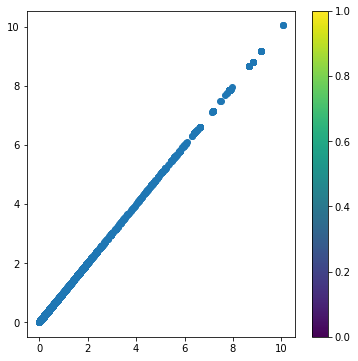

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_values[:, :], encoded_values[:, :])
plt.colorbar()
plt.show()

In [21]:
decoded_label = decoder.predict(encoded_values)
decoded_label

array([[1.0098768e-02, 4.5561202e-12, 3.6276993e-12, ..., 2.2161038e-28,
        2.2110727e-08, 4.8924159e-12],
       [5.2225660e-06, 1.2391526e-02, 1.9570589e-02, ..., 1.0795337e-02,
        6.1477809e-03, 1.9420093e-03],
       [2.0279775e-05, 3.6606213e-10, 1.3863715e-09, ..., 1.1802082e-16,
        8.0068743e-09, 3.2276397e-11],
       ...,
       [2.9690133e-03, 3.0991959e-03, 8.8046532e-04, ..., 8.0211703e-03,
        1.2924020e-03, 1.6893425e-04],
       [5.6377309e-04, 2.2259834e-09, 7.8729583e-09, ..., 1.1267335e-17,
        2.7160351e-07, 6.6453909e-10],
       [1.8942114e-02, 4.1841701e-04, 4.1762087e-05, ..., 1.7563187e-05,
        1.8533994e-05, 6.9423203e-07]], dtype=float32)

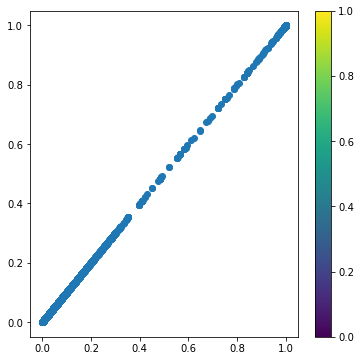

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(decoded_label[:, :], decoded_label[:, :])
plt.colorbar()
plt.show()

In [23]:
predicted_label = decoded_label.round()
predicted_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
one_hot_test_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [26]:
c_matrix.shape

(262, 2, 2)

In [27]:
c_matrix

array([[[921,   0],
        [ 11,   0]],

       [[930,   0],
        [  2,   0]],

       [[932,   0],
        [  0,   0]],

       ...,

       [[927,   0],
        [  5,   0]],

       [[921,   0],
        [ 11,   0]],

       [[929,   0],
        [  3,   0]]], dtype=int64)

In [28]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='micro'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.15021459227467812
precision :  0.9184397163120568
recall :  0.19561933534743203
f1 :  0.32254047322540474
hamming_loss :  0.00445565639026308


In [29]:
print('accuracy : ', accuracy_score(one_hot_test_labels, predicted_label))
print('precision : ', precision_score(one_hot_test_labels, predicted_label, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, predicted_label, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, predicted_label, average='samples'))
print('hamming_loss : ', hamming_loss(one_hot_test_labels, predicted_label))

accuracy :  0.15021459227467812
precision :  0.2757510729613734
recall :  0.20726037195994276
f1 :  0.22789699570815447
hamming_loss :  0.00445565639026308


C:\Users\user\.conda\envs\mlc2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
"""labels = ["".join("c" + str(i)) for i in range(1, 21)]
labels"""

'labels = ["".join("c" + str(i)) for i in range(1, 21)]\nlabels'

In [31]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):\n\n    df_cm = pd.DataFrame(\n        confusion_matrix, index=class_names, columns=class_names,\n    )\n\n    try:\n        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)\n    except ValueError:\n        raise ValueError("Confusion matrix values must be integers.")\n    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha=\'right\', fontsize=fontsize)\n    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha=\'right\', fontsize=fontsize)\n    axes.set_xlabel(\'True label\')\n    axes.set_ylabel(\'Predicted label\')\n    axes.set_title("Confusion Matrix for the class - " + class_label)'

In [32]:
"""fig, ax = plt.subplots(5, 4, figsize=(12, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])
    
fig.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(5, 4, figsize=(12, 12))\n    \nfor axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):\n    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])\n    \nfig.tight_layout()\nplt.show()'